Now that we've done body comp - let's get into the swim analysis - first let's load in all our apple data then take a look at that first

In [91]:
import pandas as pd
import plotly.graph_objects as go
from IPython.display import display, HTML

# --- Load and clean the workout data (HKWorkoutActivityTypeSwimming) ---
workout_data_path = '/Users/ngirmay/Documents/GitHub/ironman_retrospective/apple_health/health_data_exported/HKWorkoutActivityTypeSwimming_2024-04-99_18-31-37_SimpleHealthExportCSV.csv'
workout_data = pd.read_csv(workout_data_path, skiprows=1)

# Select the necessary columns
workout_data = workout_data[['startDate', 'totalEnergyBurned', 'totalDistance', 'totalSwimmingStrokeCount', 'duration']]

# Ensure 'startDate' is parsed as datetime
workout_data['startDate'] = pd.to_datetime(workout_data['startDate'], errors='coerce')

# Convert 'totalEnergyBurned', 'totalDistance', 'totalSwimmingStrokeCount', and 'duration' to numeric
workout_data['totalEnergyBurned'] = pd.to_numeric(workout_data['totalEnergyBurned'].str.replace(' kcal', '', regex=False), errors='coerce')
workout_data['totalDistance'] = pd.to_numeric(workout_data['totalDistance'].str.replace(' m', '', regex=False), errors='coerce')
workout_data['totalSwimmingStrokeCount'] = pd.to_numeric(workout_data['totalSwimmingStrokeCount'].str.replace(' count', '', regex=False), errors='coerce')
workout_data['duration'] = pd.to_numeric(workout_data['duration'], errors='coerce')

# Convert duration from seconds to minutes
workout_data['duration_min'] = workout_data['duration'] / 60

# Calculate the average stroke count per minute
workout_data['avgStrokeCountPerMin'] = workout_data['totalSwimmingStrokeCount'] / (workout_data['duration'] / 60)

# Filter out rows with missing values in key columns
filtered_workout_data = workout_data.dropna(subset=['startDate', 'totalEnergyBurned', 'totalDistance', 'totalSwimmingStrokeCount', 'duration'])

# Define important dates
training_start_date = pd.to_datetime("2022-12-01")
ironman_event_date = pd.to_datetime("2023-07-23")

# --- Overlay 1: Calories Burned and Total Distance Swum Over Time ---
fig1 = go.Figure()

# Add Calories Burned as a line plot
fig1.add_trace(go.Scatter(x=filtered_workout_data['startDate'], y=filtered_workout_data['totalEnergyBurned'],
                          mode='lines+markers', name='Calories Burned (Kcal)', line=dict(color='#e63946')))

# Add Total Distance as a line plot on the same graph
fig1.add_trace(go.Scatter(x=filtered_workout_data['startDate'], y=filtered_workout_data['totalDistance'],
                          mode='lines+markers', name='Total Distance (m)', line=dict(color='#457b9d'), yaxis='y2'))

# Add green vertical lines for training start and Ironman event
fig1.add_shape(type='line', x0=training_start_date, x1=training_start_date, y0=0, y1=filtered_workout_data['totalEnergyBurned'].max(),
               line=dict(color='green', dash='dash'))

fig1.add_shape(type='line', x0=ironman_event_date, x1=ironman_event_date, y0=0, y1=filtered_workout_data['totalEnergyBurned'].max(),
               line=dict(color='green', dash='dash'))

# Add annotations for the vertical lines
fig1.add_annotation(x=training_start_date, y=filtered_workout_data['totalEnergyBurned'].max(),
                    text="Training Start", showarrow=False, yshift=10, font=dict(color="black"))
fig1.add_annotation(x=ironman_event_date, y=filtered_workout_data['totalEnergyBurned'].max(),
                    text="Ironman Event", showarrow=False, yshift=10, font=dict(color="black"))

# Add secondary y-axis for the distance
fig1.update_layout(
    title="Calories Burned and Total Distance Over Time",
    xaxis=dict(title='Date'),
    yaxis=dict(title='Calories Burned (Kcal)', titlefont=dict(color='#e63946')),
    yaxis2=dict(title='Total Distance (m)', titlefont=dict(color='#457b9d'), overlaying='y', side='right'),
    plot_bgcolor='#f1faee'
)

# --- Overlay 2: Duration (Minutes) and Average Stroke Count Per Minute Over Time ---
fig2 = go.Figure()

# Add Duration (in minutes) as a line plot
fig2.add_trace(go.Scatter(x=filtered_workout_data['startDate'], y=filtered_workout_data['duration_min'],
                          mode='lines+markers', name='Duration (minutes)', line=dict(color='#457b9d')))

# Add Average Stroke Count Per Minute as a line plot on the same graph
fig2.add_trace(go.Scatter(x=filtered_workout_data['startDate'], y=filtered_workout_data['avgStrokeCountPerMin'],
                          mode='lines+markers', name='Avg Stroke Count/Min', line=dict(color='#e63946'), yaxis='y2'))

# Add green vertical lines for training start and Ironman event
fig2.add_shape(type='line', x0=training_start_date, x1=training_start_date, y0=0, y1=filtered_workout_data['duration_min'].max(),
               line=dict(color='green', dash='dash'))

fig2.add_shape(type='line', x0=ironman_event_date, x1=ironman_event_date, y0=0, y1=filtered_workout_data['duration_min'].max(),
               line=dict(color='green', dash='dash'))

# Add annotations for the vertical lines
fig2.add_annotation(x=training_start_date, y=filtered_workout_data['duration_min'].max(),
                    text="Training Start", showarrow=False, yshift=10, font=dict(color="black"))
fig2.add_annotation(x=ironman_event_date, y=filtered_workout_data['duration_min'].max(),
                    text="Ironman Event", showarrow=False, yshift=10, font=dict(color="black"))

# Add secondary y-axis for the average stroke count per minute
fig2.update_layout(
    title="Duration and Average Stroke Count Per Minute Over Time",
    xaxis=dict(title='Date'),
    yaxis=dict(title='Duration (minutes)', titlefont=dict(color='#457b9d')),
    yaxis2=dict(title='Avg Stroke Count/Min', titlefont=dict(color='#e63946'), overlaying='y', side='right'),
    plot_bgcolor='#f1faee'
)

# Show the plots
fig1.show()
fig2.show()

# --- Summary Statistics ---
summary_stats = filtered_workout_data[['totalEnergyBurned', 'totalDistance', 'totalSwimmingStrokeCount', 'duration_min', 'avgStrokeCountPerMin']].describe().T
summary_stats.columns = ['Count', 'Mean', 'Std Dev', 'Min', '25%', '50%', '75%', 'Max']

# Round the summary statistics to two decimal places
summary_stats = summary_stats.round(2)

# Display summary statistics in a neat format
summary_html = summary_stats.to_html(classes="table table-striped", border=0)
display(HTML(f"<h3>Summary Statistics</h3>{summary_html}"))


,Count,Mean,Std Dev,Min,25%,50%,75%,Max
totalEnergyBurned,39.0,415.44,259.82,24.51,271.42,395.65,490.94,1303.37
totalDistance,39.0,1442.89,948.10,54.86,914.40,1316.74,1645.92,4397.84
totalSwimmingStrokeCount,39.0,855.15,566.13,28.00,538.00,792.00,1045.00,2611.99
duration_min,39.0,43.39,23.30,2.65,29.20,45.24,52.90,99.05
avgStrokeCountPerMin,39.0,18.90,3.84,5.44,16.99,19.12,21.02,26.37


In [115]:
import os
import pandas as pd
import io
from IPython.display import display, HTML

# Function to read the metadata and swim data separately
def read_swim_file(filepath):
    # Read the file and split into lines
    with open(filepath, 'r') as file:
        lines = file.readlines()

    # Extract metadata (first 2 rows) and swim data (starting from row 4)
    metadata_lines = lines[:2]
    swim_data_lines = lines[3:]

    # Parse metadata
    metadata = pd.read_csv(io.StringIO(''.join(metadata_lines)), header=0, names=['Swim Date', 'Swim Title', 'Swim Start Time', 'Swim End Time', 'Activity Variant', 'Pool Size', 'HR Device', 'Device', 'Location', 'Firmware'])
    
    # Parse the swim data
    max_cols = max([len(line.split(',')) for line in swim_data_lines])
    swim_data = pd.read_csv(io.StringIO(''.join(swim_data_lines)), 
                            header=0,  # Use the 4th row as header
                            skip_blank_lines=True)
    
    return metadata, swim_data

# Initialize lists to store metadata and swim data
all_metadata = []
all_swim_data = []

# Set path to your folder containing all files
swim_data_path = '/Users/ngirmay/Documents/GitHub/ironman_retrospective/form_swimming/form_swim_data/'

# List all the files in the directory
all_files = [file for file in os.listdir(swim_data_path) if file.endswith('.csv')]

# Read each file and store the metadata and swim data
for file in all_files:
    try:
        metadata, swim_data = read_swim_file(os.path.join(swim_data_path, file))
        metadata['Source File'] = file  # Add source file info to metadata
        swim_data['Source File'] = file  # Add source file info to swim data
        
        all_metadata.append(metadata)
        all_swim_data.append(swim_data)
    except Exception as e:
        print(f"Error parsing {file}: {e}")

# Only combine data if files were successfully read
if all_swim_data:
    combined_swim_data = pd.concat(all_swim_data, ignore_index=True)
    print("Combined Swim Data (First 5 Rows):")
    display(HTML(combined_swim_data.head(5).to_html(classes="table table-striped", border=0)))
    
    # Save combined swim data to CSV
    combined_swim_data.to_csv(os.path.join(swim_data_path, 'combined_swim_data.csv'), index=False)
    print(f"Combined swim data saved to: {os.path.join(swim_data_path, 'combined_swim_data.csv')}")

if all_metadata:
    combined_metadata = pd.concat(all_metadata, ignore_index=True)
    print("\nCombined Metadata (First 5 Rows):")
    display(HTML(combined_metadata.head(5).to_html(classes="table table-striped", border=0)))
    
    # Save combined metadata to CSV
    combined_metadata.to_csv(os.path.join(swim_data_path, 'combined_metadata.csv'), index=False)
    print(f"Combined metadata saved to: {os.path.join(swim_data_path, 'combined_metadata.csv')}")
else:
    print("No valid data was loaded.")


Combined Swim Data (First 5 Rows):


,Swim Date,Swim Time,Set #,Set,Interval (yd),Length (yd),Strk,Move Time,Rest Time,Cumul Time,Len,Dist (yd),Cumul Dist (yd),Avg DPS,Pace/100,Pace/50,SWOLF,Avg Strk Rate (strk/min),Strk Count,Avg Strk Count/Len,Calories,Source File,Interval (m),Length (m),Dist (m),Cumul Dist (m)
0,05/02/2023,05:29:26PM,1,2x20,20.0,20.0,FR,0:20.71,0:00.00,0:20.71,1,20.0,20.0,0.50,1:43.56,0:51.78,39,59,18,18,4,FORM_2023-05-02_172926.csv,NaN,NaN,NaN,NaN
1,05/02/2023,05:29:46PM,1,2x20,20.0,0.0,REST,0:00.00,0:04.55,0:25.26,1,0.0,20.0,0.00,0:00.00,0:00.00,0,0,0,0,0,FORM_2023-05-02_172926.csv,NaN,NaN,NaN,NaN
2,05/02/2023,05:29:51PM,1,2x20,20.0,20.0,FR,0:21.04,0:00.00,0:46.30,1,20.0,40.0,0.95,1:45.23,0:52.61,38,56,17,17,4,FORM_2023-05-02_172926.csv,NaN,NaN,NaN,NaN
3,05/02/2023,05:30:12PM,1,2x20,20.0,0.0,REST,0:00.00,0:04.77,0:51.07,1,0.0,40.0,0.00,0:00.00,0:00.00,0,0,0,0,0,FORM_2023-05-02_172926.csv,NaN,NaN,NaN,NaN
4,05/02/2023,05:30:17PM,2,1x120,120.0,20.0,FR,0:21.36,0:00.00,1:12.44,1,20.0,60.0,0.97,1:46.82,0:53.41,38,58,17,17,4,FORM_2023-05-02_172926.csv,NaN,NaN,NaN,NaN


Combined swim data saved to: /Users/ngirmay/Documents/GitHub/ironman_retrospective/form_swimming/form_swim_data/combined_swim_data.csv

Combined Metadata (First 5 Rows):


,Swim Date,Swim Title,Swim Start Time,Swim End Time,Activity Variant,Pool Size,HR Device,Device,Location,Firmware,Source File
0,05/02/2023,NaN,05:29:26PM,06:38:46PM,pool,18.29,NaN,goggles,NaN,2.2.396,FORM_2023-05-02_172926.csv
1,06/09/2023,NaN,05:46:25PM,06:24:28PM,pool,18.29,NaN,goggles,NaN,2.2.396,FORM_2023-06-09_174625.csv
2,04/05/2023,NaN,05:45:34PM,06:43:02PM,pool,18.29,NaN,goggles,NaN,2.2.366,FORM_2023-04-05_174534.csv
3,06/25/2023,NaN,02:24:53PM,03:26:40PM,pool,18.29,NaN,goggles,NaN,2.2.396,FORM_2023-06-25_142453.csv
4,06/02/2023,NaN,06:22:35PM,07:01:16PM,pool,18.29,NaN,goggles,NaN,2.2.396,FORM_2023-06-02_182235.csv


Combined metadata saved to: /Users/ngirmay/Documents/GitHub/ironman_retrospective/form_swimming/form_swim_data/combined_metadata.csv


In [128]:
import os
import pandas as pd
import io

# Function to read and clean swim data from the file
def read_swim_file(filepath):
    # Read file
    with open(filepath, 'r') as file:
        lines = file.readlines()

    # Parse metadata and swim data
    metadata_lines = lines[:2]
    swim_data_lines = lines[3:]
    
    metadata = pd.read_csv(io.StringIO(''.join(metadata_lines)), header=0)
    swim_data = pd.read_csv(io.StringIO(''.join(swim_data_lines)), skip_blank_lines=True)
    
    return metadata, swim_data

# Function to convert time strings to total seconds (e.g., '01:43.6' -> 103.6 seconds)
def time_to_seconds(time_str):
    try:
        minutes, seconds = time_str.split(':')
        total_seconds = int(minutes) * 60 + float(seconds)
        return total_seconds
    except:
        return None  # Handle invalid entries

# Read and combine all files in the folder
swim_data_path = '/Users/ngirmay/Documents/GitHub/ironman_retrospective/form_swimming/form_swim_data/'
all_files = [file for file in os.listdir(swim_data_path) if file.endswith('.csv')]

# Initialize lists for storing combined data
all_swim_data = []

for file in all_files:
    _, swim_data = read_swim_file(os.path.join(swim_data_path, file))
    swim_data['Source File'] = file  # Add source file info
    all_swim_data.append(swim_data)

# Combine all swim data
combined_swim_data = pd.concat(all_swim_data, ignore_index=True)

# Clean and convert time columns
combined_swim_data['Move Time (seconds)'] = combined_swim_data['Move Time'].apply(time_to_seconds)
combined_swim_data['Rest Time (seconds)'] = combined_swim_data['Rest Time'].apply(time_to_seconds)

# Convert pace columns to seconds
combined_swim_data['Pace/100 (seconds)'] = combined_swim_data['Pace/100'].apply(time_to_seconds)
combined_swim_data['Pace/50 (seconds)'] = combined_swim_data['Pace/50'].apply(time_to_seconds)

# Convert columns that should be numeric
numeric_columns = ['Calories', 'Dist (yd)', 'Avg Strk Count/Len', 'Avg DPS', 'Pace/100 (seconds)', 'Pace/50 (seconds)', 'SWOLF', 'Avg Strk Rate (strk/min)', 'Strk Count']
for col in numeric_columns:
    combined_swim_data[col] = pd.to_numeric(combined_swim_data[col], errors='coerce')

# Aggregation logic: Sum totals and take means where appropriate
agg_dict = {
    'Calories': 'sum',
    'Dist (yd)': 'sum',
    'Move Time (seconds)': 'sum',
    'Rest Time (seconds)': 'sum',
    'Avg Strk Count/Len': 'mean',
    'Avg DPS': 'mean',
    'Pace/100 (seconds)': 'mean',
    'Pace/50 (seconds)': 'mean',
    'SWOLF': 'mean',
    'Avg Strk Rate (strk/min)': 'mean',
    'Strk Count': 'sum',
    'Interval (yd)': 'sum',
    'Length (yd)': 'sum'
}

# Perform the aggregation by 'Swim Date'
workout_agg = combined_swim_data.groupby('Swim Date').agg(agg_dict).reset_index()

# Convert times from seconds to minutes for better readability
workout_agg['Move Time (min)'] = workout_agg['Move Time (seconds)'] / 60
workout_agg['Rest Time (min)'] = workout_agg['Rest Time (seconds)'] / 60

# Convert pace back to 'mm:ss' format
workout_agg['Pace/100'] = workout_agg['Pace/100 (seconds)'].apply(lambda x: f"{int(x // 60)}:{x % 60:.1f}" if pd.notnull(x) else None)
workout_agg['Pace/50'] = workout_agg['Pace/50 (seconds)'].apply(lambda x: f"{int(x // 60)}:{x % 60:.1f}" if pd.notnull(x) else None)

# Drop the seconds columns now that we have minutes and formatted pace times
workout_agg = workout_agg.drop(columns=['Move Time (seconds)', 'Rest Time (seconds)', 'Pace/100 (seconds)', 'Pace/50 (seconds)'])

# Save the aggregated data
output_path = os.path.join(swim_data_path, 'aggregated_swim_data.csv')
workout_agg.to_csv(output_path, index=False)

# Output for visual confirmation
print("Aggregated Swim Data with Fixed Pace:")
print(workout_agg.head())


Aggregated Swim Data with Fixed Pace:
    Swim Date  Calories  Dist (yd)  Avg Strk Count/Len   Avg DPS      SWOLF  \
0  04/04/2023     187.0      920.0           11.918919  0.550946  27.067568   
1  04/05/2023     355.0     1660.0            9.780822  0.656096  23.013699   
2  04/06/2023     324.0     2020.0            6.903704  0.268593  27.059259   
3  04/07/2023     392.0     2000.0           13.231343  0.437761  36.850746   
4  04/13/2023     279.0     1380.0           15.880000  0.532933  44.266667   

   Avg Strk Rate (strk/min)  Strk Count  Interval (yd)  Length (yd)  \
0                 31.918919       882.0         2960.0        920.0   
1                 27.904110      1428.0         4280.0       1660.0   
2                 17.000000       932.0        73220.0       2020.0   
3                 29.910448      1773.0        18320.0       2000.0   
4                 41.533333      1191.0        23480.0       1380.0   

   Move Time (min)  Rest Time (min) Pace/100 Pace/50  
0    

In [130]:
import pandas as pd
import plotly.graph_objects as go

# Load the aggregated swim data
data_path = '/Users/ngirmay/Documents/GitHub/ironman_retrospective/form_swimming/form_swim_data/aggregated_swim_data.csv'  # Replace with your correct path if needed
swim_data = pd.read_csv(data_path)

# Ensure 'Swim Date' is in datetime format
swim_data['Swim Date'] = pd.to_datetime(swim_data['Swim Date'])

# --- Visualization 1: Calories Burned and Total Distance Swum Over Time ---
fig1 = go.Figure()

# Add Calories Burned as a line plot
fig1.add_trace(go.Scatter(x=swim_data['Swim Date'], y=swim_data['Calories'],
                          mode='lines+markers', name='Calories Burned (Kcal)', line=dict(color='#e63946')))

# Add Total Distance as a line plot on the same graph
fig1.add_trace(go.Scatter(x=swim_data['Swim Date'], y=swim_data['Dist (yd)'],
                          mode='lines+markers', name='Total Distance (yd)', line=dict(color='#457b9d'), yaxis='y2'))

# Add secondary y-axis for the distance
fig1.update_layout(
    title="Calories Burned and Total Distance Over Time (yd)",
    xaxis=dict(title='Date'),
    yaxis=dict(title='Calories Burned (Kcal)', titlefont=dict(color='#e63946')),
    yaxis2=dict(title='Total Distance (yd)', titlefont=dict(color='#457b9d'), overlaying='y', side='right'),
    plot_bgcolor='#f1faee'
)

# Show the first plot
fig1.show()

# --- Visualization 2: Duration and Average Stroke Count Per Length Over Time ---
fig2 = go.Figure()

# Add Duration (in minutes) as a line plot
fig2.add_trace(go.Scatter(x=swim_data['Swim Date'], y=swim_data['Move Time (min)'],
                          mode='lines+markers', name='Duration (minutes)', line=dict(color='#457b9d')))

# Add Average Stroke Count Per Length as a line plot on the same graph
fig2.add_trace(go.Scatter(x=swim_data['Swim Date'], y=swim_data['Avg Strk Count/Len'],
                          mode='lines+markers', name='Avg Stroke Count/Length', line=dict(color='#e63946'), yaxis='y2'))

# Add secondary y-axis for the average stroke count per length
fig2.update_layout(
    title="Duration and Average Stroke Count Per Length Over Time",
    xaxis=dict(title='Date'),
    yaxis=dict(title='Duration (minutes)', titlefont=dict(color='#457b9d')),
    yaxis2=dict(title='Avg Stroke Count/Length', titlefont=dict(color='#e63946'), overlaying='y', side='right'),
    plot_bgcolor='#f1faee'
)

# Show the second plot
fig2.show()

# Optionally: Save the visualizations as images or HTML files if needed
# fig1.write_image("calories_distance_swim.png")
# fig2.write_image("duration_stroke_count_swim.png")


In [157]:
import pandas as pd
import plotly.graph_objects as go

# Load the aggregated swim data
swim_data_path = '/Users/ngirmay/Documents/GitHub/ironman_retrospective/form_swimming/form_swim_data/aggregated_swim_data.csv'
swim_data = pd.read_csv(swim_data_path)

# Convert 'Swim Date' to datetime
swim_data['Swim Date'] = pd.to_datetime(swim_data['Swim Date'], errors='coerce')

# Convert 'Pace/100' from 'min:sec' format to seconds for proper plotting
def convert_pace_to_seconds(pace_str):
    try:
        mins, secs = pace_str.split(":")
        return int(mins) * 60 + float(secs)
    except:
        return None

swim_data['Pace/100_sec'] = swim_data['Pace/100'].apply(convert_pace_to_seconds)

# --- Visualization 1: Average DPS and SWOLF Over Time ---
fig1 = go.Figure()

# Add Avg DPS as a line plot
fig1.add_trace(go.Scatter(x=swim_data['Swim Date'], y=swim_data['Avg DPS'],
                          mode='lines+markers', name='Avg DPS', line=dict(color='#e63946')))

# Add SWOLF as a line plot on the same graph
fig1.add_trace(go.Scatter(x=swim_data['Swim Date'], y=swim_data['SWOLF'],
                          mode='lines+markers', name='SWOLF', line=dict(color='#457b9d'), yaxis='y2'))

# Add secondary y-axis for the SWOLF score
fig1.update_layout(
    title="Average DPS and SWOLF Over Time",
    xaxis=dict(title='Date'),
    yaxis=dict(title='Avg DPS', titlefont=dict(color='#e63946')),
    yaxis2=dict(title='SWOLF', titlefont=dict(color='#457b9d'), overlaying='y', side='right'),
    plot_bgcolor='#f1faee'
)

# --- Visualization 2: Pace per 100 and Average Stroke Rate Over Time ---
fig2 = go.Figure()

# Add Pace/100 as a line plot using the converted 'Pace/100_sec'
fig2.add_trace(go.Scatter(x=swim_data['Swim Date'], y=swim_data['Pace/100_sec'],
                          mode='lines+markers', name='Pace/100 (seconds)', line=dict(color='#e63946')))

# Add Average Stroke Rate as a line plot on the same graph
fig2.add_trace(go.Scatter(x=swim_data['Swim Date'], y=swim_data['Avg Strk Rate (strk/min)'],
                          mode='lines+markers', name='Avg Stroke Rate (strk/min)', line=dict(color='#457b9d'), yaxis='y2'))

# Add secondary y-axis for the Average Stroke Rate
fig2.update_layout(
    title="Pace per 100 and Average Stroke Rate Over Time",
    xaxis=dict(title='Date'),
    yaxis=dict(title='Pace/100 (seconds)', titlefont=dict(color='#e63946')),
    yaxis2=dict(title='Avg Stroke Rate (strk/min)', titlefont=dict(color='#457b9d'), overlaying='y', side='right'),
    plot_bgcolor='#f1faee'
)

# --- Visualization 3: Interval Distance and Stroke Count Over Time ---
fig3 = go.Figure()

# Add Interval Distance as a line plot
fig3.add_trace(go.Scatter(x=swim_data['Swim Date'], y=swim_data['Interval (yd)'],
                          mode='lines+markers', name='Interval Distance (yd)', line=dict(color='#e63946')))

# Add Stroke Count as a line plot on the same graph
fig3.add_trace(go.Scatter(x=swim_data['Swim Date'], y=swim_data['Strk Count'],
                          mode='lines+markers', name='Stroke Count', line=dict(color='#457b9d'), yaxis='y2'))

# Add secondary y-axis for the Stroke Count
fig3.update_layout(
    title="Interval Distance and Stroke Count Over Time",
    xaxis=dict(title='Date'),
    yaxis=dict(title='Interval Distance (yd)', titlefont=dict(color='#e63946')),
    yaxis2=dict(title='Stroke Count', titlefont=dict(color='#457b9d'), overlaying='y', side='right'),
    plot_bgcolor='#f1faee'
)

# Show all the plots
fig1.show()
fig2.show()
fig3.show()


In [17]:
import cv2
import os
import numpy as np

def extract_frames(video_path, output_folder, frame_interval=30):
    # Create output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    # Open the video file
    cap = cv2.VideoCapture(video_path)

    # Get video properties
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    print(f"Processing video: {os.path.basename(video_path)}")
    print(f"FPS: {fps}, Total Frames: {total_frames}")

    frame_count = 0
    saved_count = 0

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        # Save frame at specified intervals
        if frame_count % frame_interval == 0:
            # Enhance frame quality
            enhanced_frame = enhance_frame(frame)

            # Save the frame as a high-quality JPEG
            frame_filename = os.path.join(output_folder, f"frame_{frame_count:06d}.jpg")
            cv2.imwrite(frame_filename, enhanced_frame, [cv2.IMWRITE_JPEG_QUALITY, 95])
            saved_count += 1

        frame_count += 1

        # Print progress
        if frame_count % 100 == 0:
            print(f"Processed {frame_count} frames, Saved {saved_count} frames")

    cap.release()
    print(f"Completed. Total frames processed: {frame_count}, Frames saved: {saved_count}")

def enhance_frame(frame):
    # Convert to float32
    frame_f = frame.astype(np.float32) / 255.0

    # Increase contrast
    alpha = 1.2  # Contrast control (1.0-3.0)
    beta = 0  # Brightness control (0-100)
    frame_contrasted = cv2.convertScaleAbs(frame_f, alpha=alpha, beta=beta)

    # Apply slight sharpening
    kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    frame_sharpened = cv2.filter2D(frame_contrasted, -1, kernel)

    # Convert back to uint8
    frame_enhanced = (frame_sharpened * 255).clip(0, 255).astype(np.uint8)

    return frame_enhanced

# Set up main output directory
main_output_dir = '/Users/ngirmay/Documents/GitHub/ironman_retrospective/IronMan_2023/form_swimming/form_breakdown/swim_frames/'
os.makedirs(main_output_dir, exist_ok=True)

# Video paths
video_paths = [
    '/Users/ngirmay/Documents/GitHub/ironman_retrospective/IronMan_2023/form_swimming/swim_video_1.MOV',
    '/Users/ngirmay/Documents/GitHub/ironman_retrospective/IronMan_2023/form_swimming/swim_video_2.MOV'
]

# Process each video
for video_path in video_paths:
    video_name = os.path.splitext(os.path.basename(video_path))[0]
    output_folder = os.path.join(main_output_dir, video_name)
    extract_frames(video_path, output_folder, frame_interval=30)  # Save a frame every second (assuming 30 fps)

print("All videos processed. Frames extracted and saved.")

Processing video: swim_video_1.MOV
FPS: 29, Total Frames: 395
Processed 100 frames, Saved 4 frames
Processed 200 frames, Saved 7 frames
Processed 300 frames, Saved 10 frames
Completed. Total frames processed: 395, Frames saved: 14
Processing video: swim_video_2.MOV
FPS: 29, Total Frames: 385
Processed 100 frames, Saved 4 frames
Processed 200 frames, Saved 7 frames
Processed 300 frames, Saved 10 frames
Completed. Total frames processed: 385, Frames saved: 13
All videos processed. Frames extracted and saved.


In [7]:
import os
import yt_dlp

def download_youtube_video(url, duration=30, output_path=None):
    try:
        # Set the output path to the Downloads folder if not specified
        if output_path is None:
            output_path = os.path.join(os.path.expanduser("~"), "Downloads")
        
        # Ensure the output directory exists
        os.makedirs(output_path, exist_ok=True)

        # Configure yt-dlp options
        ydl_opts = {
            'format': 'bestvideo[ext=mp4]',  # Best video quality, mp4 format, no audio
            'outtmpl': os.path.join(output_path, '%(title)s.%(ext)s'),
            'noplaylist': True,
            'no_warnings': True,
            'quiet': True,
            'postprocessors': [{
                'key': 'FFmpegVideoConvertor',
                'preferedformat': 'mp4',
            }],
            'max_filesize': 50 * 1024 * 1024,  # 50 MB limit
            'duration': duration  # Limit video duration
        }

        # Download the video
        with yt_dlp.YoutubeDL(ydl_opts) as ydl:
            info = ydl.extract_info(url, download=True)
            video_title = info['title']
            video_path = ydl.prepare_filename(info)

        print(f"Download complete. Video saved to: {video_path}")
        return video_path
        
    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None

# Use the function with the specific video
video_url = "https://www.youtube.com/watch?v=DULBP1Hyp1o"
output_video_path = download_youtube_video(video_url)

if output_video_path:
    print(f"The video is saved at: {output_video_path}")
else:
    print("Failed to download the video.")

Download complete. Video saved to: /Users/ngirmay/Downloads/flumin' perfection 🏊.mp4
The video is saved at: /Users/ngirmay/Downloads/flumin' perfection 🏊.mp4


I0000 00:00:1728158901.710693 7963407 gl_context.cc:357] GL version: 2.1 (2.1 ATI-5.1.35), renderer: AMD Radeon Pro 555X OpenGL Engine


Starting video analysis...


Analyzing swim_video_1.MOV:   0%|          | 0/395 [00:00<?, ?it/s]W0000 00:00:1728158901.905641 8108753 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1728158901.951663 8108761 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
Analyzing swim_video_1.MOV:  12%|█▏        | 46/395 [00:01<00:07, 49.08it/s]/usr/local/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning:

SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.

Analyzing swim_video_1.MOV: 100%|██████████| 395/395 [00:11<00:00, 35.78it/s]
I0000 00:00:1728158912.815520 7963407 gl_context.cc:357] GL version: 2.1 (2.1 ATI-5.1.35), renderer: AMD Radeon Pro 555X OpenGL Engine
Analyzing swim_video_2.MOV:   0%|  

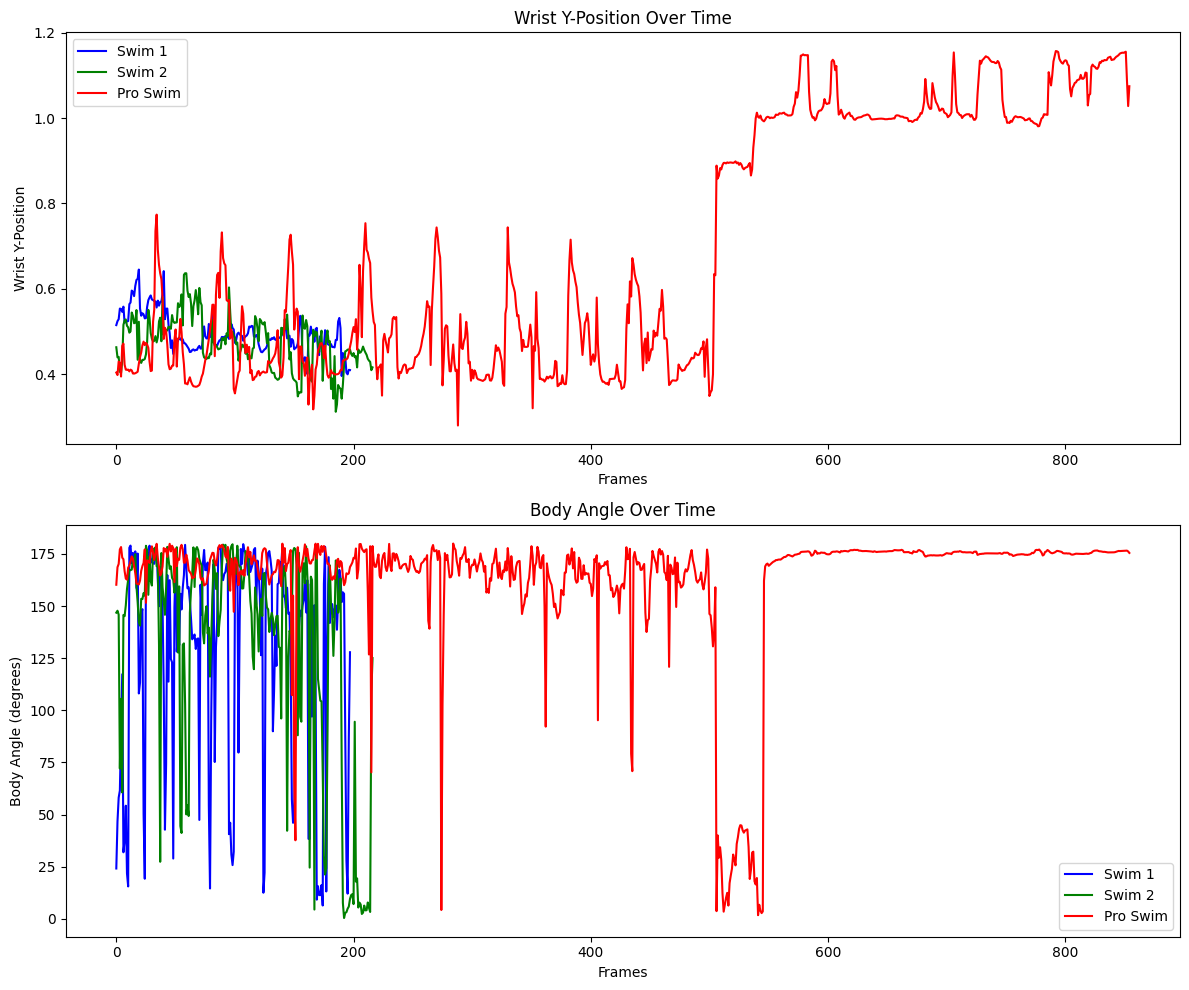

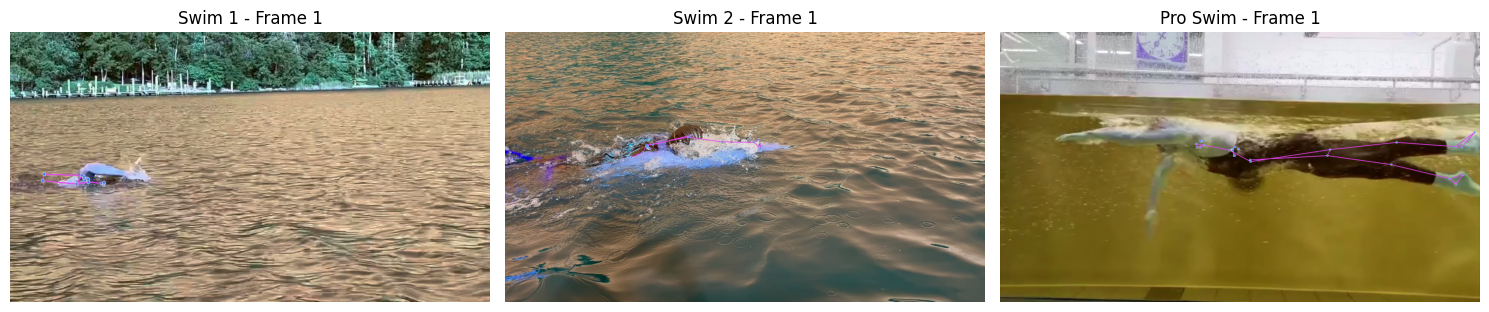

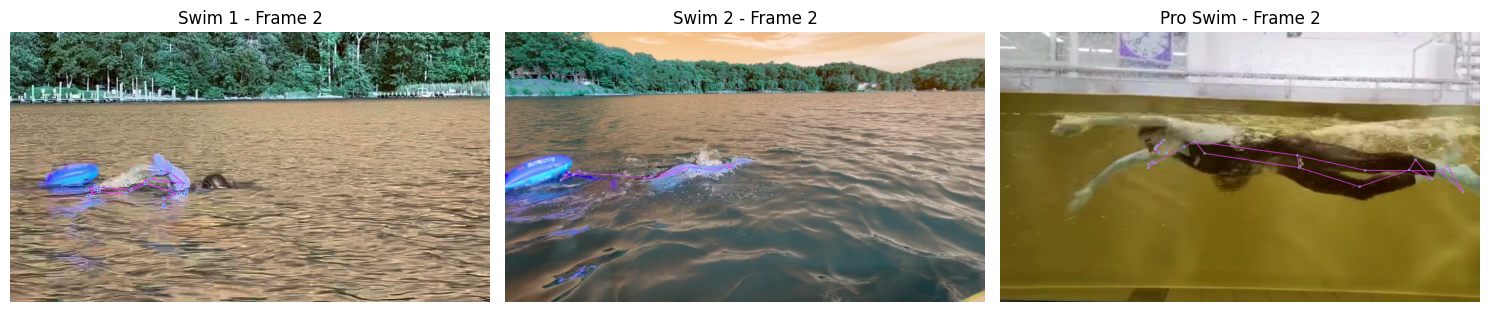

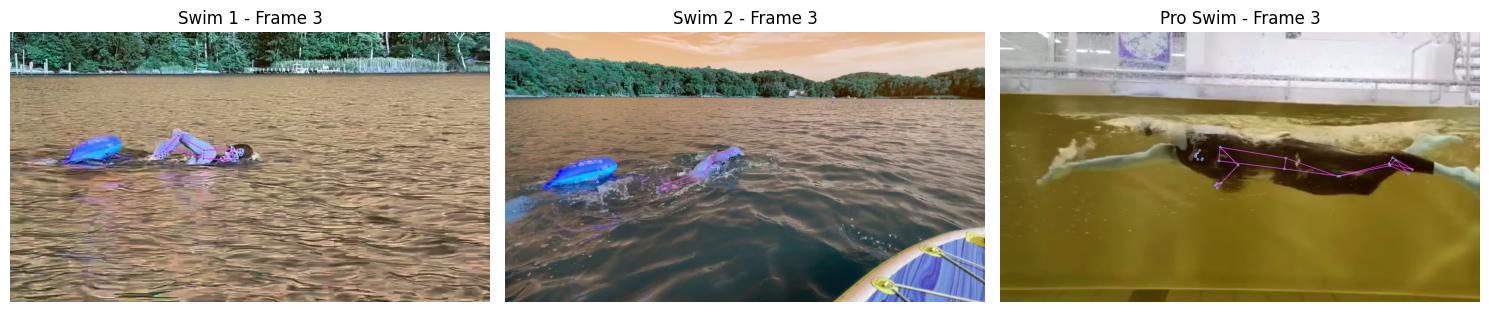

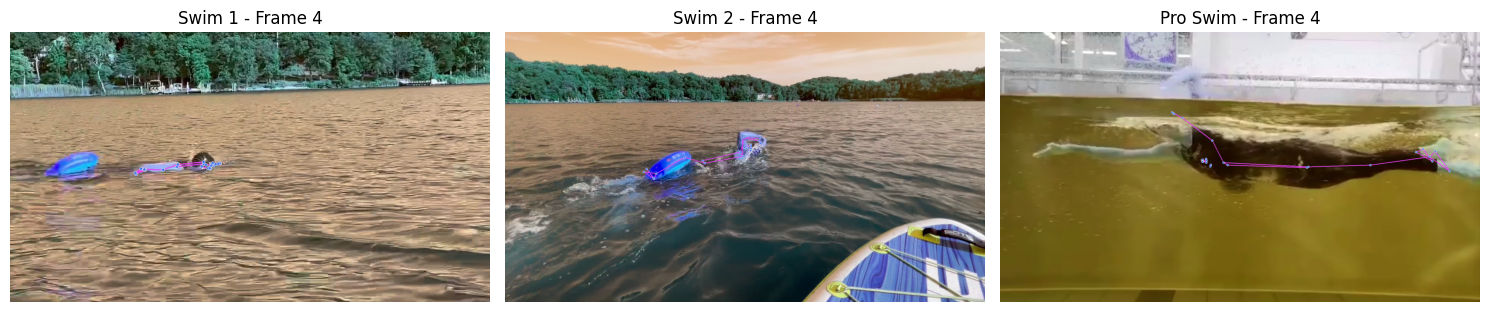

Analysis complete. Results saved to '/Users/ngirmay/Documents/GitHub/ironman_retrospective/IronMan_2023/form_swimming/form_breakdown/swim_analysis_results.txt'
Visualizations saved as PNG files in '/Users/ngirmay/Documents/GitHub/ironman_retrospective/IronMan_2023/form_swimming/form_breakdown/'


In [35]:
import cv2
import mediapipe as mp
import numpy as np
from scipy.signal import find_peaks
from tqdm import tqdm
import logging
import os
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# Set up output directory
OUTPUT_DIR = "/Users/ngirmay/Documents/GitHub/ironman_retrospective/IronMan_2023/form_swimming/form_breakdown/"
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Set up logging
logging.basicConfig(filename=os.path.join(OUTPUT_DIR, 'swim_analysis_log.txt'), level=logging.INFO, 
                    format='%(asctime)s - %(levelname)s - %(message)s')

mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

def draw_pose_landmarks(image, results):
    annotated_image = image.copy()
    mp_drawing.draw_landmarks(
        annotated_image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
        mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2),
        mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
    )
    return annotated_image

def analyze_video(video_path):
    try:
        pose = mp_pose.Pose(static_image_mode=False, min_detection_confidence=0.5, min_tracking_confidence=0.5)

        cap = cv2.VideoCapture(video_path)
        fps = int(cap.get(cv2.CAP_PROP_FPS))
        
        # Limit analysis to 30 seconds
        max_frames = 30 * fps
        frame_count = min(int(cap.get(cv2.CAP_PROP_FRAME_COUNT)), max_frames)

        wrist_y_positions = []
        body_angles = []
        key_frames = []
        time_points = []

        # Create a progress bar
        pbar = tqdm(total=frame_count, desc=f"Analyzing {video_path.split('/')[-1]}")

        for frame_idx in range(frame_count):
            ret, frame = cap.read()
            if not ret:
                break

            rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            results = pose.process(rgb_frame)

            if results.pose_landmarks:
                landmarks = results.pose_landmarks.landmark
                
                # Track wrist position for stroke rate
                wrist_y = landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y
                wrist_y_positions.append(wrist_y)
                
                # Calculate body angle for body position
                shoulder = np.array([landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,
                                     landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y])
                hip = np.array([landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,
                                landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y])
                knee = np.array([landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x,
                                 landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y])
                
                angle = calculate_angle(shoulder, hip, knee)
                body_angles.append(angle)

                # Save key frames (e.g., every 2 seconds)
                if frame_idx % (2 * fps) == 0:
                    annotated_frame = draw_pose_landmarks(rgb_frame, results)
                    key_frames.append(annotated_frame)
                    time_points.append(frame_idx / fps)

            pbar.update(1)

        pbar.close()
        cap.release()

        # Calculate metrics
        stroke_rate = calculate_stroke_rate(wrist_y_positions, fps)
        avg_body_angle = np.mean(body_angles)

        return {
            "stroke_rate": stroke_rate,
            "avg_body_angle": avg_body_angle,
            "duration": frame_count / fps,
            "key_frames": key_frames,
            "time_points": time_points,
            "wrist_y_positions": wrist_y_positions,
            "body_angles": body_angles
        }
    except Exception as e:
        logging.error(f"Error analyzing video {video_path}: {str(e)}")
        return None

def calculate_angle(a, b, c):
    ba = a - b
    bc = c - b
    cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
    angle = np.arccos(cosine_angle)
    return np.degrees(angle)

def calculate_stroke_rate(wrist_positions, fps):
    peaks, _ = find_peaks(wrist_positions, distance=fps//2)
    if len(peaks) < 2:
        return 0
    avg_time_between_peaks = np.mean(np.diff(peaks)) / fps
    return 60 / avg_time_between_peaks

def compare_swims(swim1, swim2, pro_swim):
    output = "Swim Analysis Results\n"
    output += "=====================\n\n"
    output += "Swim 1:\n"
    output += f"  Stroke Rate: {swim1['stroke_rate']:.2f} strokes/min\n"
    output += f"  Average Body Angle: {swim1['avg_body_angle']:.2f} degrees\n"
    output += f"  Duration Analyzed: {swim1['duration']:.2f} seconds\n\n"
    output += "Swim 2:\n"
    output += f"  Stroke Rate: {swim2['stroke_rate']:.2f} strokes/min\n"
    output += f"  Average Body Angle: {swim2['avg_body_angle']:.2f} degrees\n"
    output += f"  Duration Analyzed: {swim2['duration']:.2f} seconds\n\n"
    output += "Pro Swim:\n"
    output += f"  Stroke Rate: {pro_swim['stroke_rate']:.2f} strokes/min\n"
    output += f"  Average Body Angle: {pro_swim['avg_body_angle']:.2f} degrees\n"
    output += f"  Duration Analyzed: {pro_swim['duration']:.2f} seconds\n\n"

    output += "Comparison and Areas for Improvement\n"
    output += "====================================\n\n"
    
    # Stroke Rate Comparison
    avg_your_stroke_rate = (swim1['stroke_rate'] + swim2['stroke_rate']) / 2
    stroke_rate_diff = avg_your_stroke_rate - pro_swim['stroke_rate']
    output += "1. Stroke Rate:\n"
    output += f"   Your average: {avg_your_stroke_rate:.2f} strokes/min\n"
    output += f"   Pro's rate: {pro_swim['stroke_rate']:.2f} strokes/min\n"
    output += f"   Difference: {abs(stroke_rate_diff):.2f} strokes/min\n"
    if abs(stroke_rate_diff) > 5:
        output += "   Action: Focus on adjusting your stroke rate to match the pro's rhythm.\n"
        if stroke_rate_diff > 0:
            output += "   Try to slow down your strokes and increase your glide.\n"
        else:
            output += "   Try to increase your stroke turnover rate.\n"
    else:
        output += "   Your stroke rate is close to the pro's. Keep maintaining this rhythm.\n"

    # Body Angle Comparison
    avg_your_body_angle = (swim1['avg_body_angle'] + swim2['avg_body_angle']) / 2
    body_angle_diff = avg_your_body_angle - pro_swim['avg_body_angle']
    output += "\n2. Body Position:\n"
    output += f"   Your average angle: {avg_your_body_angle:.2f} degrees\n"
    output += f"   Pro's angle: {pro_swim['avg_body_angle']:.2f} degrees\n"
    output += f"   Difference: {abs(body_angle_diff):.2f} degrees\n"
    if abs(body_angle_diff) > 10:
        output += "   Action: Work on adjusting your body position to be more streamlined.\n"
        if body_angle_diff > 0:
            output += "   Try to keep your hips higher in the water.\n"
        else:
            output += "   Focus on pressing your chest down slightly to lift your hips.\n"
    else:
        output += "   Your body position is similar to the pro's. Continue to maintain this form.\n"

    output += "\nPrioritized Improvements:\n"
    improvements = [
        ("Body Position", abs(body_angle_diff)),
        ("Stroke Rate", abs(stroke_rate_diff))
    ]
    for i, (improvement, difference) in enumerate(sorted(improvements, key=lambda x: x[1], reverse=True), 1):
        output += f"{i}. {improvement}: Difference of {difference:.2f}\n"

    # Write to file
    with open(os.path.join(OUTPUT_DIR, 'swim_analysis_results.txt'), 'w') as f:
        f.write(output)

    # Display in notebook
    display(HTML(f"<pre>{output}</pre>"))

    # Create matplotlib visualizations
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
    
    colors = {'swim1': 'blue', 'swim2': 'green', 'pro': 'red'}
    labels = {'swim1': 'Swim 1', 'swim2': 'Swim 2', 'pro': 'Pro Swim'}

    # Wrist Y-Position plot
    for swim, data in [('swim1', swim1), ('swim2', swim2), ('pro', pro_swim)]:
        ax1.plot(range(len(data['wrist_y_positions'])), data['wrist_y_positions'], 
                 color=colors[swim], label=labels[swim])
    ax1.set_title("Wrist Y-Position Over Time")
    ax1.set_xlabel("Frames")
    ax1.set_ylabel("Wrist Y-Position")
    ax1.legend()

    # Body Angle plot
    for swim, data in [('swim1', swim1), ('swim2', swim2), ('pro', pro_swim)]:
        ax2.plot(range(len(data['body_angles'])), data['body_angles'], 
                 color=colors[swim], label=labels[swim])
    ax2.set_title("Body Angle Over Time")
    ax2.set_xlabel("Frames")
    ax2.set_ylabel("Body Angle (degrees)")
    ax2.legend()

    plt.tight_layout()
    plt.savefig(os.path.join(OUTPUT_DIR, "swim_analysis_plots.png"))
    plt.show()

    # Display key frames
    display(HTML("<h2>Key Frames Comparison</h2>"))
    for i in range(min(len(swim1['key_frames']), len(swim2['key_frames']), len(pro_swim['key_frames']))):
        fig, axs = plt.subplots(1, 3, figsize=(15, 5))
        axs[0].imshow(cv2.cvtColor(swim1['key_frames'][i], cv2.COLOR_BGR2RGB))
        axs[0].set_title(f"Swim 1 - Frame {i+1}")
        axs[0].axis('off')
        axs[1].imshow(cv2.cvtColor(swim2['key_frames'][i], cv2.COLOR_BGR2RGB))
        axs[1].set_title(f"Swim 2 - Frame {i+1}")
        axs[1].axis('off')
        axs[2].imshow(cv2.cvtColor(pro_swim['key_frames'][i], cv2.COLOR_BGR2RGB))
        axs[2].set_title(f"Pro Swim - Frame {i+1}")
        axs[2].axis('off')
        plt.tight_layout()
        plt.savefig(os.path.join(OUTPUT_DIR, f"key_frames_comparison_{i+1}.png"))
        plt.show()

    print(f"Analysis complete. Results saved to '{os.path.join(OUTPUT_DIR, 'swim_analysis_results.txt')}'")
    print(f"Visualizations saved as PNG files in '{OUTPUT_DIR}'")

# Analyze videos
print("Starting video analysis...")
swim1 = analyze_video("/Users/ngirmay/Documents/GitHub/ironman_retrospective/IronMan_2023/form_swimming/swim_video_1.MOV")
swim2 = analyze_video("/Users/ngirmay/Documents/GitHub/ironman_retrospective/IronMan_2023/form_swimming/swim_video_2.MOV")
pro_swim = analyze_video("/Users/ngirmay/Documents/GitHub/ironman_retrospective/IronMan_2023/form_swimming/pro_swim_video.mp4")

# Compare and provide analysis
if swim1 and swim2 and pro_swim:
    compare_swims(swim1, swim2, pro_swim)
else:
    print(f"Error occurred during video analysis. Check '{os.path.join(OUTPUT_DIR, 'swim_analysis_log.txt')}' for details.")